In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("STRIKE_REPORTS.csv")

C:\Users\gokul\AppData\Local\Temp\ipykernel_45772\1763893204.py:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("STRIKE_REPORTS.csv")


In [3]:
selected_columns = ['INCIDENT_MONTH', 'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE', 'SIZE']
df = df[selected_columns]

In [4]:
encoder = LabelEncoder()
df['SIZE'] = encoder.fit_transform(df['SIZE'].astype(str))

In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [7]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
df['CLUSTER'] = cluster_labels

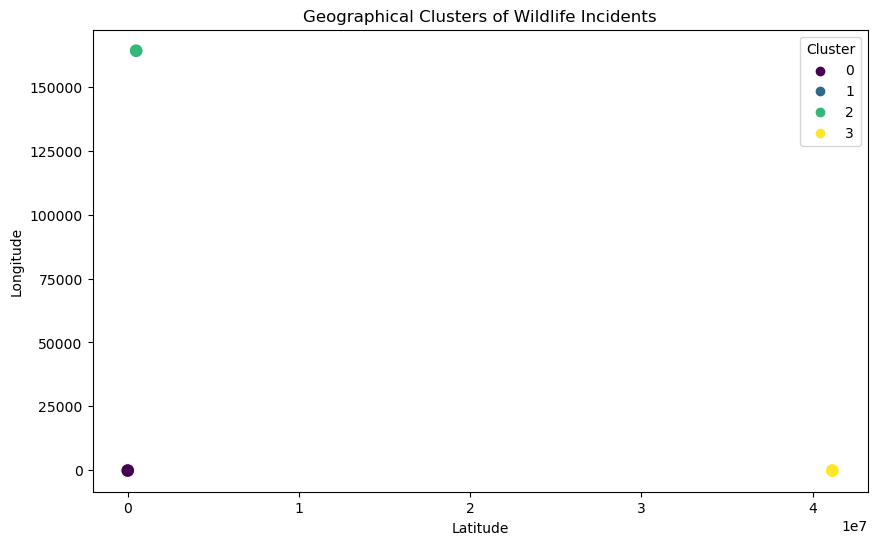

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['LATITUDE'], y=df['LONGITUDE'], hue=df['CLUSTER'], palette='viridis', s=100)
plt.title("Geographical Clusters of Wildlife Incidents")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(title="Cluster", loc='upper right')
plt.show()

C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


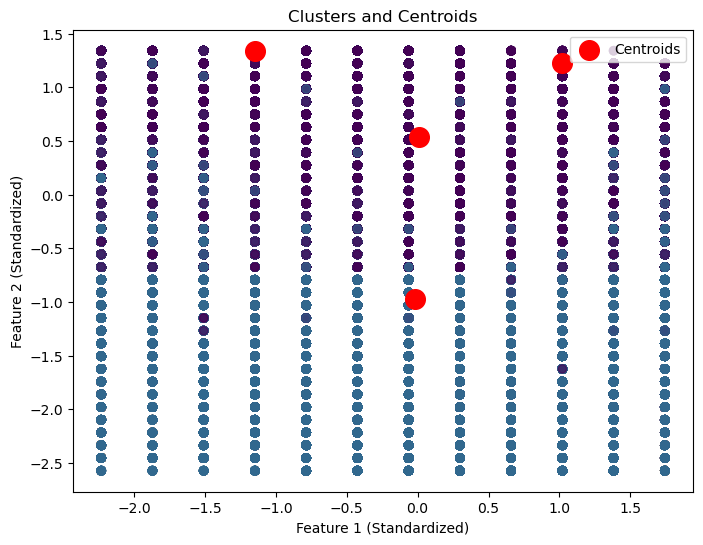

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("Clusters and Centroids")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()